# ROHP-PAZ Data exploration and modelling

### Ignacio Cobas, Didac Gallego (UAB)

## Introduction

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Data loading

#### ARCHIVE!!!

In [19]:
metadata = pd.read_pickle(r'../data/archive/paz_metadata.pkl')
profiles = pd.read_pickle(r'../data/archive/paz_profiles.pkl')
refractivity = pd.read_pickle(r'../data/archive/paz_refractivity.pkl') 
thermo_wet_Pres = pd.read_pickle(r'../data/archive/paz_thermo_wet_Pres.pkl')
thermo_wet_Temp = pd.read_pickle(r'../data/archive/paz_thermo_wet_Temp.pkl')
thermo_wet_Vp = pd.read_pickle(r'../data/archive/paz_thermo_wet_Vp.pkl')

## Data visualization

### Data description

In [20]:
metadata.head()

,roid,lat,lon,startimeUTC,az_surf,meanP_2,irTemp_2,dphi_0010,dphi_0510,dphi_1015,dphase_top_4,height_flag_smooth,height_flag_corr
0,PAZ1.2018.130.20.55.G18,37.48,126.10,2018-05-10 20:55:41,-30.59,0.00,248,-0.055016,-0.155455,-0.207968,0.1,0.00000,7.31640
1,PAZ1.2018.130.21.01.G19,4.68,153.15,2018-05-10 21:01:40,61.29,0.03,241,-0.017083,-0.353146,-0.083123,0.1,0.00000,6.72327
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,2018-05-10 21:10:33,19.90,0.00,231,-0.065611,-0.052090,-0.042271,0.1,2.88408,2.97516
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,2018-05-10 21:16:14,-7.23,0.00,283,0.020166,0.303816,-0.240090,0.1,0.00000,7.33596
4,PAZ1.2018.130.21.42.G26,-41.63,-38.13,2018-05-10 21:42:11,142.88,0.05,225,0.559503,0.294130,-0.122345,5.7,1.99907,3.03749


In [21]:
metadata.describe()

,lat,lon,az_surf,meanP_2,irTemp_2,dphi_0010,dphi_0510,dphi_1015,dphase_top_4,height_flag_smooth,height_flag_corr
count,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000,76201.000000
mean,-3.601150,-10.660725,29.850089,0.089093,252.111285,0.223661,0.142922,0.029663,1.152678,0.699045,4.785335
std,32.258754,107.252904,103.124109,5.154480,76.267190,8.162091,8.157016,0.386774,2.676388,1.262338,2.430907
min,-49.990000,-180.000000,-180.000000,-999.000000,-999.000000,-999.000000,-999.000000,-22.559900,0.100000,0.000000,0.000000
25%,-33.020000,-104.010000,-8.390000,0.000000,237.000000,-0.155792,-0.165868,-0.152545,0.100000,0.000000,2.825420
50%,-9.250000,-23.730000,31.970000,0.000000,260.000000,0.087060,0.052790,0.010512,0.100000,0.000000,4.649400
75%,26.100000,86.560000,135.850000,0.020000,278.000000,0.381959,0.301000,0.174380,0.100000,1.581180,7.121090
max,49.990000,180.000000,180.000000,34.520000,314.000000,25.386300,30.990000,13.909900,18.000000,104.449000,18.941900


In [22]:
profiles.head()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h391,h392,h393,h394,h395,h396,h397,h398,h399,h400
1,PAZ1.2018.130.21.42.G26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004964,-0.180993,...,0.180887,0.165826,0.174311,0.126288,0.092670,0.041140,0.109162,0.078077,0.055858,0.030886
3,PAZ1.2018.130.23.29.G07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.341192,0.358878,0.372899,0.355079,0.343201,0.343892,0.344728,0.361709,0.350128,0.366864
9,PAZ1.2018.130.21.53.G05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.070712,-0.016555,-0.072364,-0.095486,-0.119496,-0.118196,-0.121083,-0.112930,-0.169992,-0.160990
18,PAZ1.2018.130.22.48.G32,NaN,NaN,-13.3,-2.68239,-4.54121,-1.19872,-0.620652,-1.904360,-2.905350,...,0.270236,0.221838,0.200191,0.198203,0.235245,0.271559,0.281925,0.322198,0.334929,0.287340
19,PAZ1.2018.130.22.41.G12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.117678,-0.073476,-0.065359,-0.044248,-0.028299,-0.065856,-0.060446,-0.104593,-0.029520,-0.037323


In [23]:
profiles.describe()

,h001,h002,h003,h004,h005,h006,h007,h008,h009,h010,...,h391,h392,h393,h394,h395,h396,h397,h398,h399,h400
count,937.000000,2634.000000,6319.000000,12492.000000,19662.000000,26158.000000,31647.000000,34492.000000,39514.000000,42406.000000,...,76113.000000,76111.000000,76109.000000,76104.000000,76097.000000,76093.000000,76088.000000,76085.000000,76078.000000,76074.000000
mean,0.407878,0.538695,0.427431,0.456603,0.438970,0.444745,0.441138,0.449718,0.443357,0.449449,...,0.002833,0.002459,0.002248,0.001917,0.001842,0.001529,0.001327,0.001148,0.000816,0.000660
std,2.305102,2.439881,2.392676,2.298540,2.123973,2.035076,1.991228,1.925868,1.981379,1.988596,...,0.245221,0.245158,0.245270,0.245022,0.244772,0.244540,0.244439,0.243926,0.243775,0.243547
min,-12.814600,-18.044000,-13.714200,-23.051700,-16.328900,-17.865600,-17.822000,-16.566700,-21.226500,-25.930000,...,-1.576310,-1.587700,-1.599470,-1.651660,-1.597800,-1.550560,-1.411670,-1.422160,-1.373120,-1.320070
25%,-0.712893,-0.663882,-0.711787,-0.674685,-0.625972,-0.605853,-0.603454,-0.567280,-0.566180,-0.547244,...,-0.166483,-0.167384,-0.167626,-0.167330,-0.167258,-0.167031,-0.167194,-0.166477,-0.166707,-0.167071
50%,0.124051,0.256903,0.194087,0.231953,0.230394,0.221868,0.213186,0.215591,0.214950,0.218220,...,0.001897,0.001064,0.001028,0.000619,-0.000519,-0.000199,-0.000016,-0.000183,-0.000785,-0.000569
75%,1.175620,1.304223,1.263130,1.304625,1.233595,1.181747,1.160900,1.117587,1.106730,1.109652,...,0.172101,0.171160,0.170441,0.169822,0.169319,0.169713,0.169516,0.168850,0.167790,0.166909
max,14.442800,30.957400,22.115300,26.803400,23.490000,23.287400,26.825000,26.914700,29.541700,36.184700,...,1.658200,1.909800,1.978400,1.941260,1.874690,1.901150,1.783850,1.611920,1.475850,1.493370


In [24]:
refractivity.head()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
0,PAZ1.2018.130.22.50.G25,NaN,NaN,NaN,312.153,306.640,300.878,294.422,288.258,284.333,...,10.48890,10.31390,10.14160,9.97238,9.80627,9.64344,9.48399,9.32800,9.17553,9.02660
1,PAZ1.2018.130.21.39.G29,NaN,NaN,NaN,NaN,291.029,288.822,285.814,282.153,278.838,...,10.12510,9.95960,9.79598,9.63426,9.47448,9.31672,9.16105,9.00754,8.85629,8.70737
2,PAZ1.2018.130.20.48.G08,NaN,NaN,NaN,NaN,NaN,NaN,284.139,279.834,275.405,...,10.13310,9.98621,9.84066,9.69629,9.55297,9.41060,9.26907,9.12833,8.98833,8.84910
3,PAZ1.2018.130.21.31.G31,297.145,292.012,287.701,284.153,280.341,277.327,274.898,272.221,269.574,...,9.23884,9.08629,8.93663,8.78974,8.64549,8.50373,8.36436,8.22718,8.09211,7.95903
4,PAZ1.2018.130.22.17.G28,310.352,306.650,302.315,297.726,294.109,291.712,289.008,285.502,282.317,...,10.22730,10.07430,9.92351,9.77478,9.62814,9.48355,9.34100,9.20049,9.06204,8.92565


In [25]:
refractivity.describe()

,h001,h002,h003,h004,h005,h006,h007,h008,h009,h010,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
count,49924.000000,65576.000000,77500.000000,87223.000000,95423.000000,102286.000000,108364.000000,113529.000000,118191.000000,122389.000000,...,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,317.515878,314.367923,311.086254,307.545060,303.793496,299.930683,295.988033,291.991489,287.980962,283.963282,...,10.074061,9.911710,9.752058,9.595059,9.440666,9.288836,9.139525,8.992689,8.848286,8.706275
std,20.260666,20.030158,20.051246,19.994048,19.857232,19.634331,19.376759,19.074958,18.767970,18.464529,...,0.838165,0.827548,0.817166,0.807007,0.797063,0.787325,0.777785,0.768434,0.759266,0.750273
min,191.837000,188.869000,181.800000,181.100000,180.505000,179.801000,179.095000,178.523000,177.822000,177.279000,...,6.696090,6.577500,6.455190,6.306270,6.168560,6.041120,5.922840,5.812540,5.709100,5.611410
25%,303.346500,300.349000,297.008750,293.533000,289.878000,286.191000,282.451000,278.659000,274.867000,271.085000,...,9.911017,9.758582,9.607840,9.460100,9.314140,9.171222,9.029968,8.890490,8.753808,8.618887
50%,310.792000,307.760000,304.478000,301.037000,297.436000,293.765000,290.012000,286.223000,282.442000,278.616000,...,10.385500,10.217500,10.051800,9.889470,9.729575,9.572160,9.417530,9.265575,9.115975,8.969010
75%,325.560000,322.696500,320.032000,316.961500,313.496000,309.802000,305.880250,301.854000,297.743000,293.611000,...,10.570500,10.398400,10.229400,10.063100,9.899720,9.739080,9.581633,9.426963,9.274703,9.125390
max,392.786000,388.450000,383.053000,378.427000,380.363000,375.279000,369.544000,370.922000,364.799000,357.773000,...,11.578400,11.485400,11.385800,11.249900,11.069900,10.861700,10.642500,10.422900,10.237000,10.113300


In [26]:
thermo_wet_Pres.head()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
0,PAZ1.2018.130.22.50.G25,NaN,NaN,991.955,980.339,968.827,957.423,946.130,934.951,923.885,...,29.2504,28.7964,28.3500,27.9108,27.4793,27.0548,26.6373,26.2268,25.8229,25.4258
1,PAZ1.2018.130.21.39.G29,NaN,989.089,976.865,964.753,952.745,940.834,929.021,917.308,905.690,...,26.6322,26.1931,25.7613,25.3365,24.9188,24.5081,24.1042,23.7071,23.3167,22.9328
2,PAZ1.2018.130.20.48.G08,NaN,991.637,979.151,966.790,954.552,942.439,930.448,918.584,906.851,...,29.2804,28.8403,28.4066,27.9792,27.5582,27.1434,26.7348,26.3325,25.9363,25.5462
3,PAZ1.2018.130.21.31.G31,960.836,948.940,937.165,925.507,913.960,902.516,891.168,879.915,868.761,...,23.9323,23.5314,23.1372,22.7494,22.3680,21.9929,21.6239,21.2610,20.9041,20.5530
4,PAZ1.2018.130.22.17.G28,NaN,991.805,979.094,966.522,954.074,941.721,929.449,917.264,905.192,...,29.6339,29.1893,28.7513,28.3199,27.8950,27.4764,27.0642,26.6582,26.2583,25.8645


In [27]:
thermo_wet_Pres.describe()

,h001,h002,h003,h004,h005,h006,h007,h008,h009,h010,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
count,46943.000000,96555.000000,113105.000000,118186.000000,122389.000000,126213.000000,129893.000000,133219.000000,136386.000000,139324.000000,...,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,982.474352,980.640260,970.949864,959.511795,948.068042,936.735504,925.519926,914.417046,903.411979,892.531151,...,28.124865,27.688392,27.258965,26.836465,26.420779,26.011792,25.609394,25.213475,24.823927,24.440646
std,13.488588,14.465391,14.943377,15.034248,15.098461,15.187488,15.299912,15.429244,15.580415,15.741331,...,3.008223,2.974318,2.940808,2.907685,2.874943,2.842575,2.810575,2.778937,2.747655,2.716723
min,833.122000,824.746000,816.503000,808.342000,800.229000,792.159000,784.138000,776.168000,768.244000,760.354000,...,15.994500,15.698700,15.408600,15.124000,14.845100,14.571500,14.303300,14.040500,13.782700,13.530000
25%,973.704500,972.586000,963.152000,951.727000,940.279000,928.904000,917.592000,906.363000,895.194000,884.132500,...,27.905450,27.472475,27.046875,26.627150,26.213600,25.806900,25.405700,25.012500,24.624850,24.242650
50%,984.847000,985.480000,975.531000,964.216000,952.935000,941.774000,930.714000,919.760000,908.912000,898.168500,...,29.132100,28.682300,28.239700,27.804200,27.375600,26.953800,26.538300,26.129800,25.728150,25.332800
75%,993.324000,991.133000,981.203000,969.805000,958.460000,947.262000,936.196000,925.287000,914.490000,903.840000,...,29.667700,29.214300,28.768600,28.330200,27.898200,27.472900,27.054600,26.642900,26.237600,25.839325
max,1085.180000,1087.530000,1074.380000,1061.390000,1048.550000,1035.840000,1023.260000,1018.950000,1005.840000,992.883000,...,35.052700,34.569600,34.093600,33.624400,33.162000,32.706200,32.257000,31.814200,31.377700,30.947500


In [28]:
thermo_wet_Temp.head()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
0,PAZ1.2018.130.22.50.G25,NaN,NaN,288.983,288.155,287.473,286.876,286.421,286.022,285.551,...,216.412,216.673,216.938,217.206,217.464,217.717,217.963,218.190,218.406,218.588
1,PAZ1.2018.130.21.39.G29,NaN,274.963,274.069,273.114,271.941,270.694,269.558,268.488,267.119,...,204.129,204.096,204.085,204.091,204.108,204.147,204.193,204.249,204.316,204.388
2,PAZ1.2018.130.20.48.G08,NaN,270.012,269.290,268.554,267.886,267.189,266.537,266.048,265.558,...,224.253,224.121,224.021,223.934,223.875,223.843,223.828,223.869,223.931,224.035
3,PAZ1.2018.130.21.31.G31,274.645,273.756,273.203,272.444,271.586,270.514,269.355,268.228,267.273,...,201.029,200.979,200.921,200.855,200.785,200.711,200.630,200.549,200.473,200.409
4,PAZ1.2018.130.22.17.G28,NaN,265.445,264.982,264.419,263.340,261.720,260.008,258.626,258.082,...,224.858,224.852,224.844,224.835,224.836,224.840,224.849,224.860,224.872,224.884


In [29]:
thermo_wet_Temp.describe()

,h001,h002,h003,h004,h005,h006,h007,h008,h009,h010,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
count,46943.000000,96555.000000,113105.000000,118186.000000,122389.000000,126213.000000,129893.000000,133219.000000,136386.000000,139324.000000,...,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,274.987001,280.764823,280.623887,280.306760,280.037726,279.763296,279.512017,279.241026,278.949980,278.662976,...,216.270029,216.395079,216.520673,216.646521,216.772932,216.900129,217.028006,217.156394,217.285282,217.414748
std,13.069526,14.241711,13.859325,13.769385,13.698506,13.652996,13.647501,13.646052,13.662102,13.673610,...,9.880712,9.893767,9.907406,9.921331,9.935639,9.950592,9.965996,9.981634,9.997544,10.013731
min,222.175000,228.827000,226.966000,230.380000,229.674000,227.387000,224.524000,227.112000,228.034000,228.397000,...,176.953000,177.078000,177.213000,177.346000,177.475000,177.588000,177.689000,177.780000,177.204000,176.499000
25%,268.437000,271.442000,271.401000,270.938000,270.469000,269.998000,269.550000,269.113000,268.652000,268.246000,...,213.361000,213.518000,213.666000,213.815000,213.962000,214.103000,214.248000,214.396000,214.546750,214.687000
50%,274.479000,280.698000,281.223000,281.000000,280.820000,280.615000,280.413000,280.198000,280.002000,279.793000,...,216.915000,217.097000,217.273000,217.446000,217.619000,217.792000,217.972500,218.151000,218.329000,218.503000
75%,281.360000,293.744000,292.640000,292.300000,292.032000,291.750000,291.549000,291.306000,291.077000,290.823000,...,221.045000,221.168250,221.301000,221.432250,221.559000,221.697000,221.837000,221.983250,222.128000,222.270000
max,336.919000,342.111000,347.964000,352.371000,354.782000,354.894000,354.475000,353.698000,355.174000,354.986000,...,264.392000,264.576000,264.769000,264.967000,265.175000,265.387000,265.602000,265.811000,266.013000,266.201000


In [30]:
thermo_wet_Vp.head()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
0,PAZ1.2018.130.22.50.G25,NaN,NaN,11.20490,10.68830,10.00300,9.23720,8.35168,7.62670,7.23855,...,0.000131,0.000129,0.000127,0.000125,0.000123,0.000122,0.000120,0.000118,0.000116,0.000114
1,PAZ1.2018.130.21.39.G29,NaN,3.83761,3.77015,3.76700,3.78815,3.74655,3.60245,3.30350,3.03500,...,0.000125,0.000123,0.000121,0.000119,0.000118,0.000116,0.000114,0.000113,0.000111,0.000110
2,PAZ1.2018.130.20.48.G08,NaN,3.38858,3.23436,3.08128,2.90594,2.71090,2.49915,2.24415,2.00514,...,0.000149,0.000147,0.000145,0.000143,0.000142,0.000140,0.000138,0.000136,0.000135,0.000133
3,PAZ1.2018.130.21.31.G31,5.15766,4.64152,4.31851,4.06133,3.80873,3.63295,3.51858,3.41200,3.32333,...,0.000117,0.000116,0.000114,0.000113,0.000111,0.000109,0.000108,0.000106,0.000105,0.000103
4,PAZ1.2018.130.22.17.G28,NaN,3.24003,2.90557,2.61667,2.41410,2.30204,2.01089,1.76453,1.67529,...,0.000146,0.000144,0.000142,0.000141,0.000139,0.000137,0.000135,0.000134,0.000132,0.000130


In [31]:
thermo_wet_Vp.describe()

,h001,h002,h003,h004,h005,h006,h007,h008,h009,h010,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
count,46943.000000,96555.000000,113105.000000,118186.000000,122389.000000,126213.000000,129893.000000,133219.000000,136386.000000,139324.000000,...,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,7.010513,9.809868,9.551072,9.335005,9.108033,8.855326,8.572689,8.282339,7.973194,7.670207,...,0.000133,0.000131,0.000130,0.000128,0.000126,0.000124,0.000123,0.000121,0.000119,0.000118
std,6.261401,7.400871,7.060947,6.910058,6.751410,6.575554,6.389650,6.204545,6.019461,5.837240,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012,0.000012
min,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000010,0.000011,0.000012,0.000014,0.000015,0.000017,0.000018,0.000020,0.000021,0.000021
25%,3.210370,4.197510,4.158520,3.996617,3.843750,3.682600,3.508830,3.332065,3.151687,2.971728,...,0.000127,0.000125,0.000123,0.000122,0.000120,0.000118,0.000116,0.000115,0.000113,0.000112
50%,5.332810,7.381730,7.455410,7.284325,7.103990,6.904550,6.673640,6.432010,6.173995,5.926860,...,0.000133,0.000131,0.000130,0.000128,0.000126,0.000124,0.000122,0.000121,0.000119,0.000117
75%,8.234125,14.559100,13.885100,13.659175,13.405100,13.092200,12.701900,12.302150,11.865575,11.431475,...,0.000140,0.000138,0.000136,0.000135,0.000133,0.000131,0.000129,0.000128,0.000126,0.000124
max,34.056800,33.999400,32.442400,31.978400,31.182400,30.025400,29.200400,28.547300,27.201000,26.988000,...,0.000494,0.000510,0.000526,0.000543,0.000561,0.000579,0.000598,0.000618,0.000638,0.000659


### Cleaning up data

#### metadata

In [32]:
metadata[metadata.dphi_0010 < -10].dphi_0010

2623    -999.0000
25405   -999.0000
39833    -14.2628
49667   -999.0000
76590   -999.0000
77351   -999.0000
Name: dphi_0010, dtype: float64

They look like outliers

In [33]:
metadata[metadata.dphi_0010 > 10].dphi_0010

459      12.9057
679      12.4212
685      24.5210
938      11.4241
945      13.6561
          ...   
76256    12.6497
77037    15.9144
77198    13.1179
78204    10.0622
78421    11.8160
Name: dphi_0010, Length: 120, dtype: float64

I think these are the ones that we really care about. They look like outliers but it's just the rainy days.

In [34]:
metadata = metadata[metadata.dphi_0010 > -10]

In [35]:
metadata.dphi_0510.describe()

count    76195.000000
mean         0.208676
std          1.012709
min         -6.223580
25%         -0.165826
50%          0.052832
75%          0.301021
max         30.990000
Name: dphi_0510, dtype: float64

This dphi looks better, I dont think there are any outliers here.

In [36]:
metadata.dphi_1015.describe()

count    76195.000000
mean         0.029805
std          0.384449
min        -22.559900
25%         -0.152543
50%          0.010512
75%          0.174376
max         13.909900
Name: dphi_1015, dtype: float64

In [37]:
metadata[metadata.dphi_1015 < -5]

,roid,lat,lon,startimeUTC,az_surf,meanP_2,irTemp_2,dphi_0010,dphi_0510,dphi_1015,dphase_top_4,height_flag_smooth,height_flag_corr
78121,PAZ1.2021.321.06.55.G19,-12.61,-29.76,2021-11-17 06:55:38,-23.54,0.0,285,1.99478,3.92877,-22.5599,0.1,19.2875,15.5981


There's only one row with dphi_1015 below -5, so ill delete it

In [38]:
metadata = metadata[metadata.dphi_1015 > -5]

In [39]:
metadata[metadata.meanP_2 < -4].meanP_2

17441   -999.0
45219   -999.0
Name: meanP_2, dtype: float64

In [40]:
metadata = metadata[metadata.meanP_2 > 0]

In [41]:
metadata[metadata.irTemp_2 < 0].irTemp_2

2319    -999
3127    -999
3189    -999
3191    -999
3352    -999
        ... 
64259   -999
65725   -999
69225   -999
69718   -999
77311   -999
Name: irTemp_2, Length: 123, dtype: int64

In [42]:
metadata = metadata[metadata.irTemp_2 > 0]

In [43]:
metadata = metadata.reset_index()

#### profiles

In [44]:
# TODO

#### refractivity

In [45]:
# TODO

#### thermo_wet

Let's check if NaN values in Pres, Temp and Vp are in the same places.

In [46]:
(thermo_wet_Pres.isna().sum() == thermo_wet_Temp.isna().sum()).all()

True

In [47]:
(thermo_wet_Pres.isna().sum() == thermo_wet_Vp.isna().sum()).all()

True

The hypothesis was right, so we can handle these NaNs together.

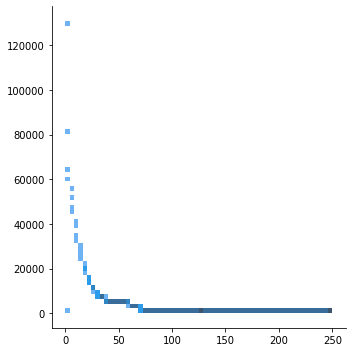

In [48]:
sns.displot(x=range(thermo_wet_Pres.shape[1]), y=thermo_wet_Pres.isna().sum(), bins=int(thermo_wet_Pres.shape[1]/4))

### Plotting precipitation over a map

In [49]:
data = metadata.sort_values(by='meanP_2')

In [51]:
# TODO: Only one map image should be used and IT SHOULD NOT BE A SCREENSHOT

map_1 = plt.imread(r'../data/maps/map_1.png')
map_2 = plt.imread(r'../data/maps/map_2.png')

In [52]:
data_lon_1 = data[data.lon < 0].lon
data_lon_2 = data[data.lon > 0].lon
data_lat_1 = data[data.lon < 0].lat
data_lat_2 = data[data.lon > 0].lat

In [53]:
BBox_1 = ((data_lon_1.min(), data_lon_1.max(), data_lat_1.min(), data_lat_1.max()))
BBox_2 = ((data_lon_2.min(), data_lon_2.max(), data_lat_2.min(), data_lat_2.max()))

In [54]:
colors_1 = cm.rainbow(np.linspace(0, 1, len(data_lon_1)))
colors_2 = cm.rainbow(np.linspace(0, 1, len(data_lon_2)))

It doesn't rain much over the Sahara desert lol

### Plotting vertical profiles

In [55]:
def plot_vertical_profile(roid):
    p = np.array(profiles[profiles.roid == roid])[0, 1:]
    r = np.array(refractivity[refractivity.roid == roid])[0, 1:]
    t_Pres = np.array(thermo_wet_Pres[thermo_wet_Pres.roid == roid])[0, 1:]
    t_Temp = np.array(thermo_wet_Temp[thermo_wet_Temp.roid == roid])[0, 1:]
    t_Vp = np.array(thermo_wet_Vp[thermo_wet_Vp.roid == roid])[0, 1:]
    
    fig, ax = plt.subplots(figsize=(20, 8))

    sns.scatterplot(ax=ax, x=p, y=range(len(p)))
    sns.scatterplot(ax=ax, x=r, y=range(len(r)))
    sns.scatterplot(ax=ax, x=t_Pres, y=range(len(t_Pres)))
    sns.scatterplot(ax=ax, x=t_Temp, y=range(len(t_Temp)))
    sns.scatterplot(ax=ax, x=t_Vp, y=range(len(t_Vp)))

    ax.legend(title='Vertical profile', 
              loc='upper right', 
              labels=['Vertical profile', 'Refractivity', 'Thermo wet Pressure', 'Thermo wet Temperature', 'Thermo wet Steam pressure'])

    fig.show()

#### Max dphi 0510

<ipython-input-30-df8d30104de9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


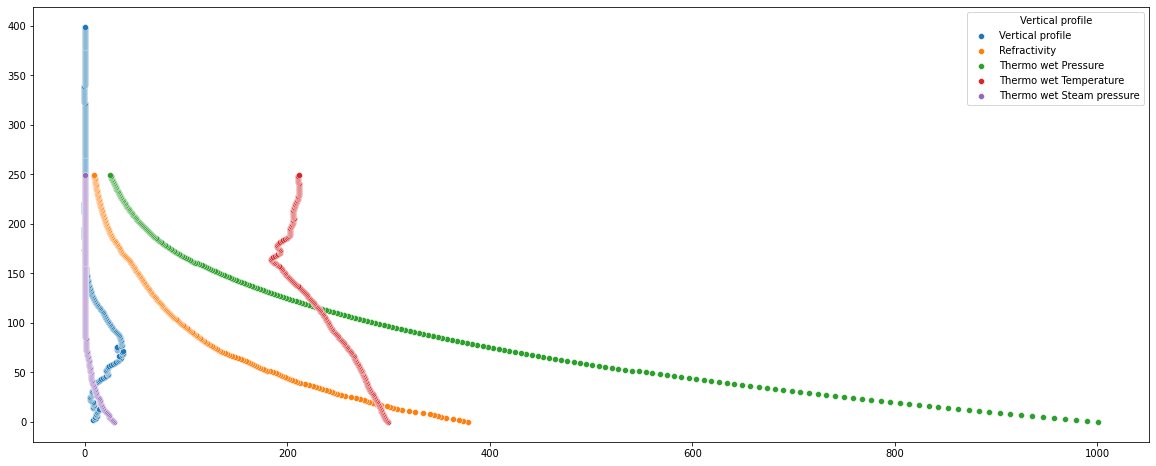

In [31]:
max_dphi_0510 = metadata[metadata.dphi_0510.max() == metadata.dphi_0510].roid.values[0]
plot_vertical_profile(max_dphi_0510)

#### Max dphi 0010

<ipython-input-49-df8d30104de9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


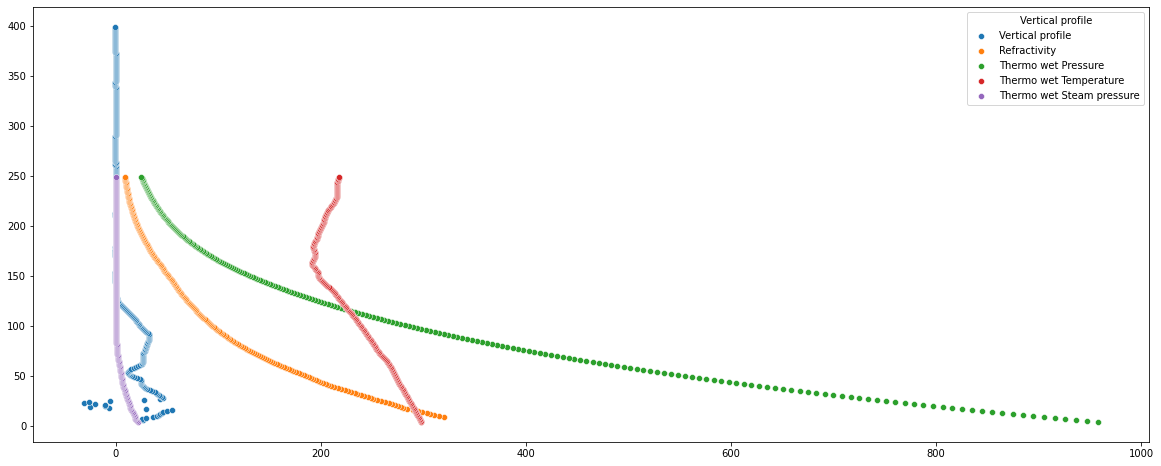

In [51]:
max_dphi_0010 = metadata[metadata.dphi_0010.max() == metadata.dphi_0010].roid.values[0]
plot_vertical_profile(max_dphi_0010)

#### Max dphi 1015

<ipython-input-47-fa725a52d5e9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


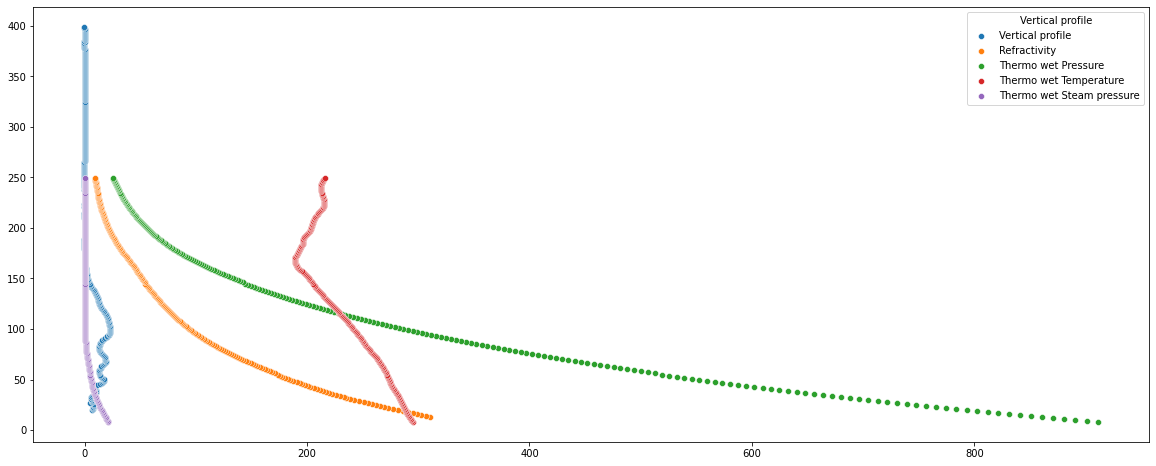

In [48]:
max_dphi_1015 = metadata[metadata.dphi_1015.max() == metadata.dphi_1015].roid.values[0]
vertical_profile_plot(max_dphi_1015)

#### Min dphi 0510

<ipython-input-47-fa725a52d5e9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


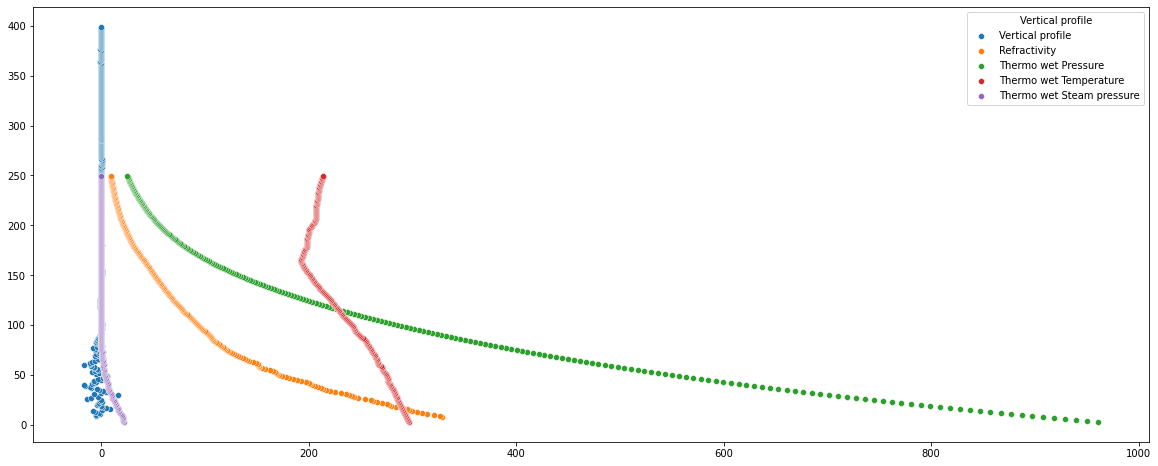

In [54]:
min_dphi_0510 = metadata[metadata.dphi_0510.min() == metadata.dphi_0510].roid.values[0]
vertical_profile_plot(min_dphi_0510)

#### Min dphi 0010

<ipython-input-30-df8d30104de9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


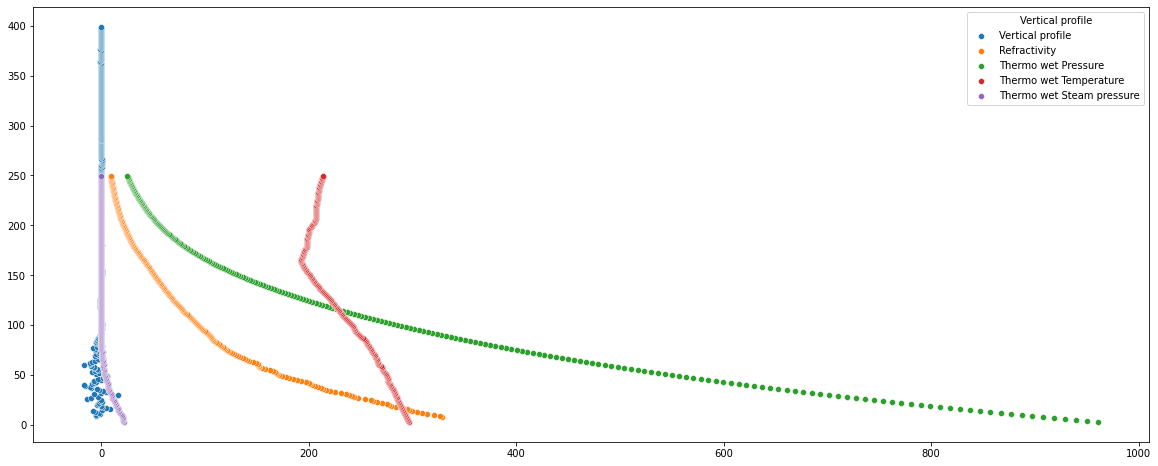

In [33]:
min_dphi_0010 = metadata[metadata.dphi_0010.min() == metadata.dphi_0010].roid.values[0]
plot_vertical_profile(min_dphi_0010)

#### Min dphi 1015

<ipython-input-30-df8d30104de9>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


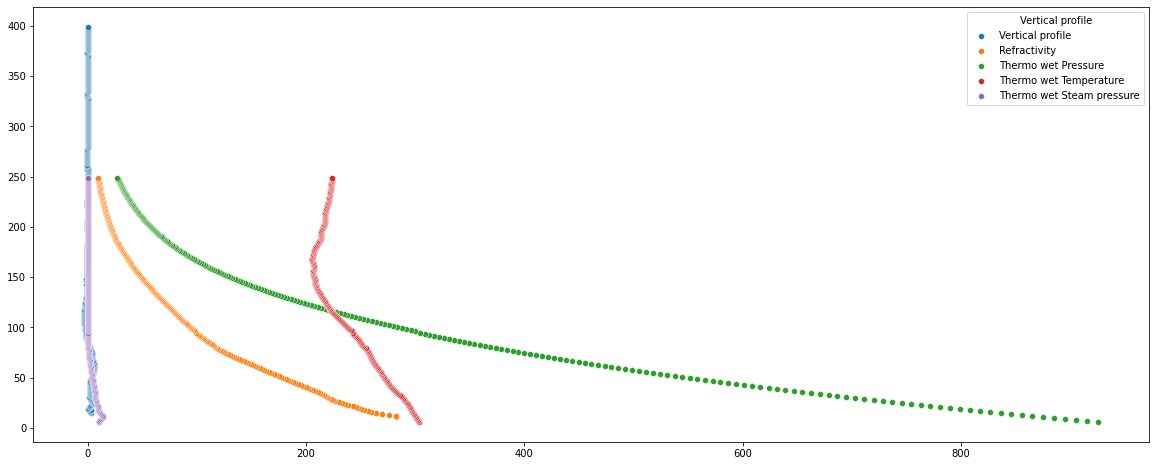

In [34]:
min_dphi_1015 = metadata[metadata.dphi_1015.min() == metadata.dphi_1015].roid.values[0]
plot_vertical_profile(min_dphi_1015)

### Tests

In [95]:
thermo_wet_Pres.isna()

,roid,h001,h002,h003,h004,h005,h006,h007,h008,h009,...,h241,h242,h243,h244,h245,h246,h247,h248,h249,h250
0,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177823,False,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177824,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177825,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
177826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
thermo_wet_Pres[1:].isna().sum(axis=1) # exclude roid column (unnecessary) and count nan values

1          1
2          1
3          0
4          1
5         15
          ..
177823     7
177824     2
177825    31
177826     0
177827     1
Length: 177827, dtype: int64

In [117]:
d = pd.DataFrame(thermo_wet_Pres.roid)

In [118]:
d['NaN_count'] = thermo_wet_Pres[1:].isna().sum(axis=1)

In [131]:
d.roid

0         PAZ1.2018.130.22.50.G25
1         PAZ1.2018.130.21.39.G29
2         PAZ1.2018.130.20.48.G08
3         PAZ1.2018.130.21.31.G31
4         PAZ1.2018.130.22.17.G28
                   ...           
177823    PAZ1.2021.334.19.39.G08
177824    PAZ1.2021.334.21.54.G04
177825    PAZ1.2021.334.22.30.G15
177826    PAZ1.2021.334.08.15.G17
177827    PAZ1.2021.334.22.08.G07
Name: roid, Length: 177828, dtype: object

In [158]:
(d.roid == metadata.roid[1])

0         False
1         False
2         False
3         False
4         False
          ...  
177823    False
177824    False
177825    False
177826    False
177827    False
Name: roid, Length: 177828, dtype: bool

In [179]:
metadata.index[d.roid[1] == metadata.roid].tolist()

[]

In [167]:
d['lat'] = -999
d['lon'] = -999

In [170]:
d.lat[0] = 1 # TODO: Solve this warning, I think it's important

<ipython-input-170-20c0eecc6bab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.lat[0] = 1 # TODO: Solve this warning, I think it's important


In [214]:
d.drop('lat', axis=1)
d.drop('lon', axis=1)

d['lat'] = -999
d['lon'] = -999

for i in range(metadata.shape[1]):
    if (d.roid == metadata.roid[i]).any():
        d.index[d.roid == metadata.roid[i]].tolist()[0]
        d.lat = metadata.lat[i]
        d.lon = metadata.lon[i]
        continue

In [195]:
d

,roid,NaN_count,lat,lon
0,PAZ1.2018.130.22.50.G25,NaN,-999.0,-999.00
1,PAZ1.2018.130.21.39.G29,1.0,-999.0,-999.00
2,PAZ1.2018.130.20.48.G08,1.0,-999.0,-999.00
3,PAZ1.2018.130.21.31.G31,0.0,-999.0,-999.00
4,PAZ1.2018.130.22.17.G28,1.0,-999.0,-999.00
...,...,...,...,...
177823,PAZ1.2021.334.19.39.G08,7.0,-999.0,-999.00
177824,PAZ1.2021.334.21.54.G04,2.0,44.6,141.78
177825,PAZ1.2021.334.22.30.G15,31.0,-999.0,-999.00
177826,PAZ1.2021.334.08.15.G17,0.0,-999.0,-999.00


In [205]:
(d.roid == 'PAZ1.2021.334.21.54.G04')
d.index[d.roid == 'PAZ1.2021.334.21.54.G04'].tolist()[0]

177824

In [210]:
d.roid.unique().shape

(177828,)

In [194]:
d.drop('lat', axis=1)
d.drop('lon', axis=1)

d['lat'] = -999
d['lon'] = -999


for i in range(d.shape[0]):
    if (d.roid[i] == metadata.roid).any():
        metadata_index = metadata.index[d.roid[i] == metadata.roid].tolist()[0]
        d.lat[i] = metadata.lat[metadata_index]
        d.lon[i] = metadata.lon[metadata_index]

<ipython-input-194-8f987f0baf29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.lat[i] = metadata.lat[metadata_index]
<ipython-input-194-8f987f0baf29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.lon[i] = metadata.lon[metadata_index]


In [211]:
(d.lat == -999).sum()

153065

In [154]:
metadata

,roid,lat,lon,startimeUTC,az_surf,meanP_2,irTemp_2,dphi_0010,dphi_0510,dphi_1015,dphase_top_4,height_flag_smooth,height_flag_corr
1,PAZ1.2018.130.21.01.G19,4.68,153.15,2018-05-10 21:01:40,61.29,0.03,241,-0.017083,-0.353146,-0.083123,0.1,0.00000,6.72327
4,PAZ1.2018.130.21.42.G26,-41.63,-38.13,2018-05-10 21:42:11,142.88,0.05,225,0.559503,0.294130,-0.122345,5.7,1.99907,3.03749
6,PAZ1.2018.130.21.53.G05,2.68,-74.44,2018-05-10 21:53:19,-147.75,0.09,220,1.047200,1.017820,0.131917,9.0,0.00000,0.00000
7,PAZ1.2018.130.22.41.G12,-3.57,119.57,2018-05-10 22:41:29,33.49,0.07,220,0.485074,0.834409,0.092818,8.8,0.00000,7.51435
11,PAZ1.2018.130.23.29.G07,5.12,-71.70,2018-05-10 23:29:06,144.31,0.86,191,1.980060,1.636040,-0.033601,9.3,0.00000,7.95068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78552,PAZ1.2021.334.18.51.G31,19.70,-176.96,2021-11-30 18:50:44,44.22,0.01,285,-0.036076,-0.103165,-0.087136,0.1,0.00000,3.36047
78553,PAZ1.2021.334.19.08.G19,-39.22,142.85,2021-11-30 19:07:53,-7.14,0.01,238,-0.222578,-0.193689,-0.115881,0.1,0.00000,6.53827
78557,PAZ1.2021.334.21.54.G04,44.60,141.78,2021-11-30 21:54:20,42.40,1.29,218,1.122960,0.388162,0.063948,6.8,0.00000,1.48749
78560,PAZ1.2021.334.23.00.G01,21.86,-84.23,2021-11-30 23:00:40,-177.11,0.41,270,-0.041854,-0.313482,0.111892,0.1,0.00000,7.14963


In [35]:
ray = xr.open_dataset("../data/2018.143/iceCol_PAZ1.2018.143.23.56.G22_2010.2640_V06.nc")

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html

In [ ]:
xr.